In [1]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

In [14]:
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [15]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')
nodelist.head(10)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771
5,b_gy2,2000,983
6,b_o,2039,1012
7,b_rc,1311,979
8,b_rd,268,1744
9,b_rd_dupe,268,1744


In [17]:
g = nx.Graph()

In [18]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [21]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.add_node(nlrow['id'], attr_dict=elrow[2:].to_dict())

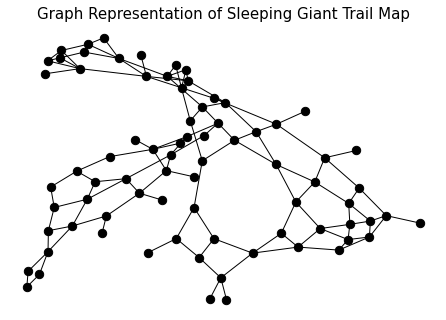

In [70]:
#plt.figure(figsize=(8, 6))
nx.draw(g, node_size=70, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()

In [26]:
print("Graph Nodes : ",len(g.nodes))
print("Graph Edges : ",len(g.edges))

Graph Nodes :  77
Graph Edges :  123


In [28]:
G_dict = nx.edge_betweenness_centrality(g)
G_dict

{('rs_end_north', 'v_rs'): 0.025974025974025976,
 ('v_rs', 'b_rs'): 0.06235724608787371,
 ('v_rs', 'v_bv'): 0.046221126568295565,
 ('v_rs', 'v_end_east'): 0.025974025974025976,
 ('b_rs', 'g_rs'): 0.0491285030758715,
 ('b_rs', 'b_bv'): 0.04746329855793755,
 ('b_rs', 'b_g'): 0.061473215283444314,
 ('g_rs', 'w_rs'): 0.05871585845519657,
 ('g_rs', 'g_rc'): 0.12904375836070095,
 ('g_rs', 'b_g'): 0.051885148004105874,
 ('w_rs', 'o_rs'): 0.0346162668865225,
 ('w_rs', 'o_w_2'): 0.031950253785724816,
 ('w_rs', 'b_w'): 0.03297077321517636,
 ('o_rs', 'y_rs'): 0.03912351098355491,
 ('o_rs', 'o_w_2'): 0.0387135213862722,
 ('o_rs', 'o_gy2'): 0.04076419316749602,
 ('y_rs', 'rs_end_south'): 0.025974025974025976,
 ('y_rs', 'y_rc'): 0.09690195795077504,
 ('y_rs', 'y_gy2'): 0.061026971081657166,
 ('rc_end_north', 'v_rc'): 0.025974025974025976,
 ('v_rc', 'b_rc'): 0.11748948224155552,
 ('v_rc', 'v_rt'): 0.1615514077516774,
 ('v_rc', 'v_bv'): 0.0708645701679307,
 ('b_rc', 'g_rc'): 0.145000076146571,
 ('b_rc

In [29]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge
edge_to_remove(g)
# First iteration Edge having Highest EBC Score

('v_rc', 'v_rt')

In [30]:
def girven_newman(graph):
    # nx.connected_components(graph) Generate connected components.
    cg=nx.connected_components(graph)
    # nx.connected_components(graph) returns num of connected components.
    cg_count=nx.number_connected_components(graph)
    
    while(cg_count==1):
        graph.remove_edge(edge_to_remove(graph)[0],edge_to_remove(graph)[1])
        cg=nx.connected_components(graph)
        cg_count=nx.number_connected_components(graph)
        
    return cg
girven_newman(g)

<generator object connected_components at 0x000002005B91C0B0>

In [31]:
comp_nodes=[]
for i in girven_newman(g):
    print(i)
    comp_nodes.append(list(i))

{'o_rs', 'w_rs', 'y_rt', 'rh_end_south', 'o_w_2', 'rc_end_south', 'b_w', 'rs_end_north', 'b_g', 'rt_end_south', 'b_gy2', 'o_tt', 'b_o', 'g_gy1', 'g_rc', 'v_bv', 'b_rc', 'rc_end_north', 'b_bv', 'park_east', 'rh_end_tt_4', 'o_rh', 'o_w_1', 'rh_end_tt_2', 'w_gy1', 'g_rt', 'y_rs', 'o_rt', 'y_rh', 'b_rs', 'nature_end_west', 'w_rt', 'o_y_tt_end_west', 'w_rc', 'b_y', 'b_end_east', 'y_gy2', 'y_rc', 'v_rc', 'o_gy2', 'w_gy2', 'v_rs', 'y_gy1', 'g_w', 'o_rc', 'v_end_east', 'o_gy1', 'rs_end_south', 'g_gy2', 'rh_end_tt_3', 'g_rs'}
{'bstub_w', 'v_rd', 'b_v', 'b_bw', 'b_end_west', 'b_tt_3', 'w_tt', 'b_rh', 'rh_end_north', 'rd_end_south', 'b_rd', 'rd_end_north', 'b_tt_2_dupe', 'b_rt', 'v_end_west', 'b_rd_dupe', 'b_tt_3_dupe', 'rt_end_north', 'tt_rt', 'v_rh', 'b_tt_2', 'w_bw', 'rh_end_tt_1', 'rd_end_south_dupe', 'v_rt', 'b_tt_1'}


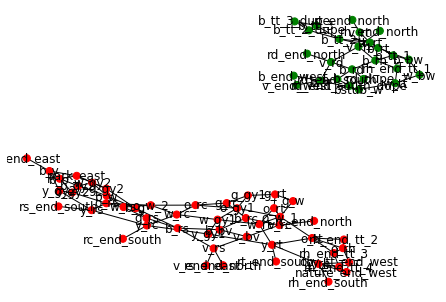

In [73]:
color_map=[]
for node in g:
    if node in comp_nodes[0]:
        color_map.append('red')
    else:
        color_map.append('green')
        
# Visualizing the Communities in Email Network
nx.draw(g, node_color=color_map, with_labels=True,node_size=50)
plt.show()